### **CS6501 - MACHINE LEARNING AND APPLICATIONS**
#### **NOTEBOOK-3: Feature ANALYSIS**

**Description:**
In this notebook, we perform an in-depth exploratory analysis of the features in the BER dataset before any feature ranking or model-based importance evaluation. The goal is to develop an intuitive, data-driven understanding of how each feature behaves, how features relate to one another, and how they correlate with the BER rating.

#### --- Library Imports ---

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [15]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', None)
colors = {
    'numerical': '#1f77b4',   
    'categorical': '#ff7f0e', 
    'missing': '#2ca02c',     
    'duplicates': '#d62728' 
}
sns.set_palette(list(colors.values()))

#### --- Load Cleaned Dataset ---

In [16]:
# Load cleaned dataset
file_path = r"..\dataset\BERPublicsearch_Cleaned.csv"
df = pd.read_csv(file_path)
print("Loaded cleaned dataset")

Loaded cleaned dataset


In [17]:
# Basic info
print(f"Dataset shape: {df.shape}\n")
print("Columns:\n", " || ".join(df.columns))

Dataset shape: (80000, 101)

Columns:
 CountyName || DwellingTypeDescr || Year_of_Construction || TypeofRating || EnergyRating || BerRating || GroundFloorArea(sq m) || UValueWall || UValueRoof || UValueFloor || UValueWindow || UvalueDoor || WallArea || RoofArea || FloorArea || WindowArea || DoorArea || NoStoreys || MainSpaceHeatingFuel || MainWaterHeatingFuel || HSMainSystemEfficiency || TGDLEdition || MPCDERValue || HSEffAdjFactor || HSSupplHeatFraction || HSSupplSystemEff || WHMainSystemEff || WHEffAdjFactor || SupplSHFuel || SupplWHFuel || SHRenewableResources || WHRenewableResources || NoOfChimneys || NoOfOpenFlues || NoOfFansAndVents || DraftLobby || VentilationMethod || FanPowerManuDeclaredValue || StructureType || PercentageDraughtStripped || NoOfSidesSheltered || PermeabilityTest || PermeabilityTestResult || TempAdjustment || HeatSystemControlCat || HeatSystemResponseCat || NoCentralHeatingPumps || CHBoilerThermostatControlled || NoOilBoilerHeatingPumps || NoGasBoilerHeatingPum

In [18]:
target_col = ['BerRating']
print(f"Target column for prediction: {target_col}")
print(df[target_col].head())

Target column for prediction: ['BerRating']
   BerRating
0     278.10
1     458.54
2     191.04
3      72.02
4     303.30


In [19]:
missing_counts = df.isna().sum()
print("Missing values per column (should be 0):")
print(missing_counts[missing_counts > 0] if missing_counts.sum() > 0 else "No missing values found")

Missing values per column (should be 0):
No missing values found


**Observations:**  
- **Number of rows:** 80,000  
- **Number of columns:** 101 
- **Target variable:** `BerRating` (numerical column representing building energy performance in kWh/m²/year)  
- All columns are already cleaned and missing values imputed and ready for further analysis.


#### --- Target Inspection and Distribution ---

In this step, we examine the target variable `BerRating` to understand its distribution across the dataset. This helps identify the typical range of BER values, potential outliers, and informs feature selection and modeling strategies.

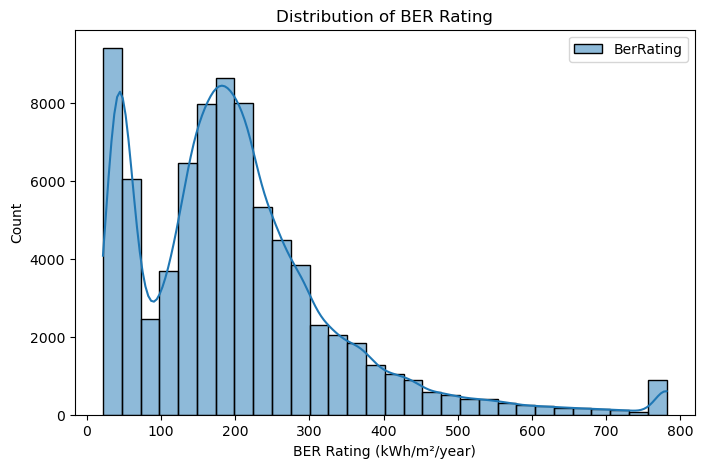

Descriptive statistics of BER Rating:
          BerRating
count  80000.000000
mean     203.920558
std      138.804850
min       21.990000
25%      114.347500
50%      185.580000
75%      259.100000
max      781.283100


In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df[target_col], bins=30, kde=True, color='skyblue')
plt.title('Distribution of BER Rating')
plt.xlabel('BER Rating (kWh/m²/year)')
plt.ylabel('Count')
plt.show()

# Optional descriptive stats
desc_stats = df[target_col].describe()
print("Descriptive statistics of BER Rating:")
print(desc_stats)

**Observations:**  
- The target variable `BerRating` remains **numerical**.  
- **Distribution:** Most buildings fall within the mid-range of BER values (roughly 114–259 kWh/m²/year).  
- **Descriptive statistics:**  
  - **Count:** 80,000  
  - **Mean:** 203.92  
  - **Standard deviation:** 138.80  
  - **Min:** 21.99  
  - **25th percentile:** 114.35  
  - **Median (50th percentile):** 185.58  
  - **75th percentile:** 259.10  
  - **Max:** 781.28  
- A small number of high-consumption outliers exist (≈780 kWh/m²/year), but the majority of observations remain concentrated around the median.  
- **Conclusion:** The distribution is consistent with the expected BER profile and is **suitable for further feature analysis and modeling**.


#### --- Feature Metadata Import and Overview ---
In this step, we import the previously prepared `BER_feature_metadata.csv`. This lookup contains **all features in the dataset**, along with their category, availability, and description.  
It helps to:  
- Group features by category 
- Know which features are **easily available** to an assessor or homeowner.  
- Provide short guidance on interpreting high vs. low values.  

In [21]:
feature_lookup_file = r'..\dataset\BER_feature_metadata.csv'  # path to your saved CSV
feature_lookup = pd.read_csv(feature_lookup_file,encoding='latin1')
print("feature_lookup loaded")

feature_lookup loaded


In [22]:
feature_lookup

,category,availability,description,feature_name
0,Geometry,easy,The name of the county where the building is located,CountyName
1,Geometry,easy,"The description of the dwelling type (single, double, semi-detached, terraced, row house, flat, townhouse, etc.)",DwellingTypeDescr
2,Geometry,easy,The year in which the building was constructed or completed,Year_of_Construction
3,Geometry,easy,"The total area of the ground floor of a building, measured in square meters",GroundFloorArea(sq m)
4,Envelope,medium,"The U-value of a wall, representing the thermal resistance of the wall to heat transfer through it",UValueWall
5,Envelope,medium,"The U-value of a roof, representing the thermal resistance of the roof to heat transfer, measured in W/m²K",UValueRoof
6,Envelope,medium,"The U-value of a floor, representing the thermal resistance of the floor to heat transfer through it",UValueFloor
7,Envelope,hard,"The U-value of a window, representing the thermal resistance of the window to heat transfer through the glass and surrounding air",UValueWindow
8,Geometry,easy,The total area of walls in square meters,WallArea
9,Geometry,easy,"The total area of the roof, including all surfaces, such as tiles, shingles, and membranes",RoofArea


#### --- Feature DataFrame Preparation & Feature Type Overview ---

In [23]:
# Drop target columns
drop_cols = ['BerRating','EnergyRating']
print(f"Total columns to drop: {len(drop_cols)}")

Total columns to drop: 2


In [24]:
# Create feature dataframe
df_feature = df.drop(columns=drop_cols, errors='ignore')
print(f"df_feature shape: {df_feature.shape}")

df_feature shape: (80000, 99)


Categorical columns: 18
Numerical columns: 81


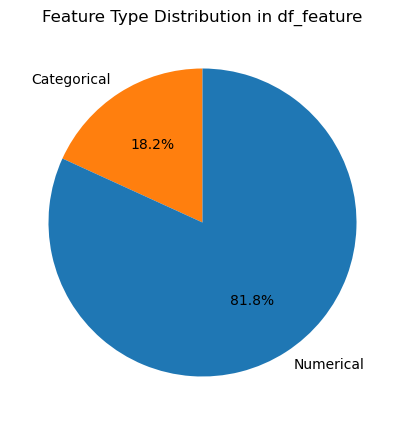

In [25]:
# Identify categorical and numerical columns
cat_cols = df_feature.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = df_feature.select_dtypes(include=['number']).columns.tolist()

print(f"Categorical columns: {len(cat_cols)}")
print(f"Numerical columns: {len(num_cols)}")

# Pie chart for feature type distribution
plt.figure(figsize=(5,5))
plt.pie(
    [len(cat_cols), len(num_cols)],
    labels=['Categorical', 'Numerical'],
    autopct='%1.1f%%',
    startangle=90,
    colors=[colors['categorical'], colors['numerical']]
)
plt.title('Feature Type Distribution in df_feature')
plt.show()

**Observation**

**Resulting Feature Composition:**
- **Total predictive features:** 99
- **Categorical features:** 18
- **Numerical features:** 81 


#### --- Numeric Feature Correlation Analysis with BER Rating ---
In this step, we analyze how each **numerical feature** correlates with the target variable **BER Rating**.  
- Positive correlation → Higher values of the feature correspond to higher BER values.
- Negative correlation → Higher values of the feature correspond to lower BER values.

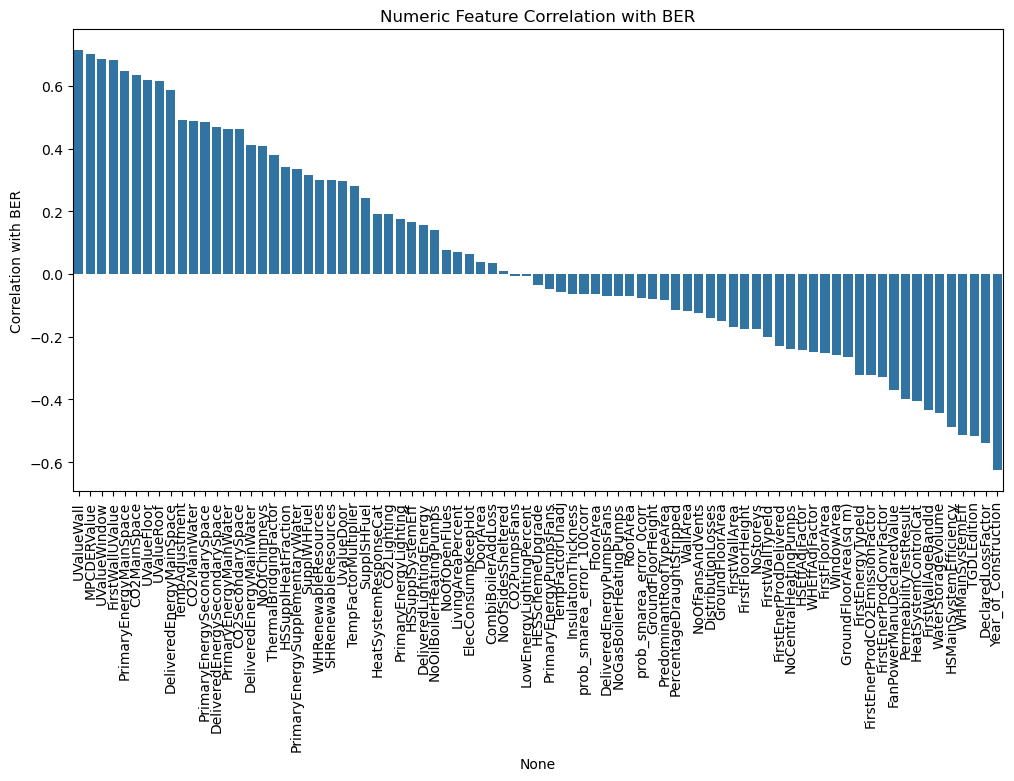

In [26]:
cols_for_corr = list(set(num_cols + ['BerRating']))

# Compute correlation matrix
corr_matrix = df[cols_for_corr].corr()

# Extract correlations with BER only
corr = corr_matrix['BerRating'].drop('BerRating')  
corr = corr.sort_values(ascending=False)

# Plot correlation distribution (using your custom numerical color)
plt.figure(figsize=(12,6))
sns.barplot(
    x=corr.index,
    y=corr.values,
    color=colors['numerical']   # <<— apply your custom color
)
plt.xticks(rotation=90)
plt.ylabel('Correlation with BER')
plt.title('Numeric Feature Correlation with BER')
plt.show()

In [27]:
# Dynamic threshold based on distribution (mean + std of absolute correlations)
mean_corr = abs(corr).mean()
std_corr = abs(corr).std()
threshold = mean_corr + std_corr

print(f"Dynamic correlation threshold (mean + std): {threshold:.2f}")

Dynamic correlation threshold (mean + std): 0.49


In [28]:
high_corr_features = corr[abs(corr) >= threshold].sort_values(ascending=False)
print(f"Number of numeric features with |correlation| ≥ {threshold:.2f}: {len(high_corr_features)}")
# Display each feature and its correlation
print("Highly correlated numeric features with BER (dynamic threshold):")
for feature, value in high_corr_features.items():
    print(f"{feature}: {value:.2f}")

Number of numeric features with |correlation| ≥ 0.49: 14
Highly correlated numeric features with BER (dynamic threshold):
UValueWall: 0.71
MPCDERValue: 0.70
UValueWindow: 0.69
FirstWallUValue: 0.68
PrimaryEnergyMainSpace: 0.65
CO2MainSpace: 0.64
UValueFloor: 0.62
UValueRoof: 0.61
DeliveredEnergyMainSpace: 0.59
TempAdjustment: 0.49
WHMainSystemEff: -0.51
TGDLEdition: -0.52
DeclaredLossFactor: -0.54
Year_of_Construction: -0.63


In [34]:
# Merge correlation results with feature lookup
corr_df = pd.DataFrame({
    'feature_name': corr.index,
    'CorrelationWithBER': corr.values
}).reset_index(drop=True)

# Merge with feature lookup to get category info
corr_with_cat = corr_df.merge(feature_lookup[['feature_name', 'category']], on='feature_name', how='left')

# Compute mean absolute correlation per category
category_corr = (
    corr_with_cat.groupby('category')['CorrelationWithBER']
    .apply(lambda x: x.abs().mean())
    .reset_index()
    .sort_values(by='CorrelationWithBER', ascending=False)
)

# Display ranked categories
print("Average absolute correlation by feature category:")
display(category_corr)

Average absolute correlation by feature category:


,category,CorrelationWithBER
1,Envelope,0.426819
0,Energy,0.321892
3,Heating,0.252271
2,Geometry,0.228725


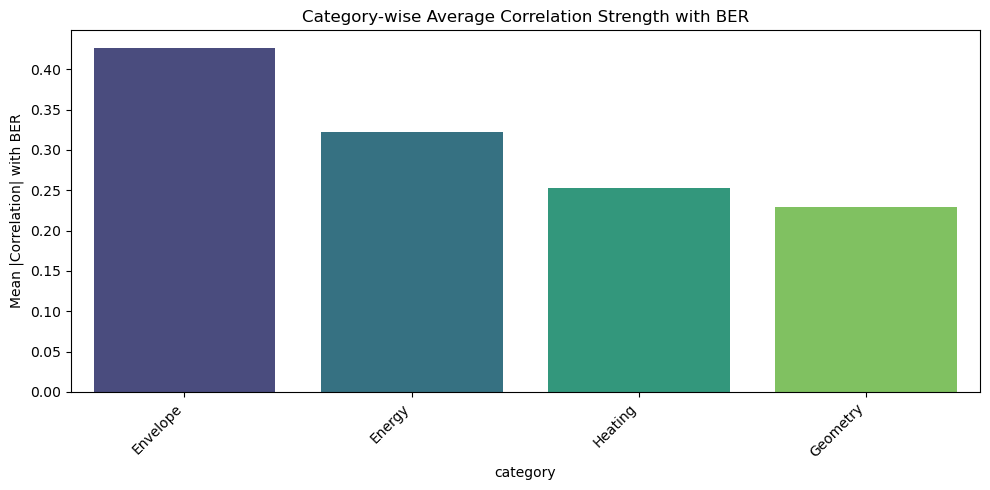

In [35]:
# Plot category-wise average correlation
plt.figure(figsize=(10,5))
sns.barplot(x='category', y='CorrelationWithBER', data=category_corr, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Mean |Correlation| with BER')
plt.title('Category-wise Average Correlation Strength with BER')
plt.tight_layout()
plt.show()

### **Observations from Correlation Analysis**

The correlation grouping indicates clear patterns in how different feature categories relate to BER (Building Energy Rating):

- **Envelope-related features show the strongest correlation with BER (≈0.43).**  
  Parameters such as wall U-values, window U-values, roof/floor insulation, and overall thermal envelope quality have the highest measurable impact on BER.  
  This aligns with building physics: heat-loss characteristics directly drive energy demand.

- **Energy-related features also display notable correlation levels (≈0.32).**  
  Metrics related to delivered/primary energy, fuel consumption, and CO₂ emissions consistently align with BER values since BER is partially derived from these energy metrics.

- **Heating system characteristics demonstrate moderate correlation (≈0.25).**  
  Efficiency of space heating, water heating, and system type contribute meaningfully but not as strongly as insulation-related variables.  
  This suggests that while heating systems matter, building envelope performance has a larger overall influence.

- **Geometry features show the weakest correlation (≈0.22).**  
  Variables such as floor area, volume, and surface geometry have limited direct influence on BER.  
  Building size alone does not strongly determine energy efficiency when compared to insulation or system efficiency.

### **Key Takeaways**
- High correlation in envelope features reinforces the importance of insulation quality and thermal transmittance (U-values).  
- Energy consumption metrics naturally track BER due to their role in the BER formula.  
- Heating system performance matters but is secondary to envelope quality.  
- Purely geometric attributes contribute far less to predicting BER on their own.

#### --- Categorical Feature Analysis with BER Rating ---
In this step, we examine how each **categorical feature** relates to the target variable **BER Rating**.  

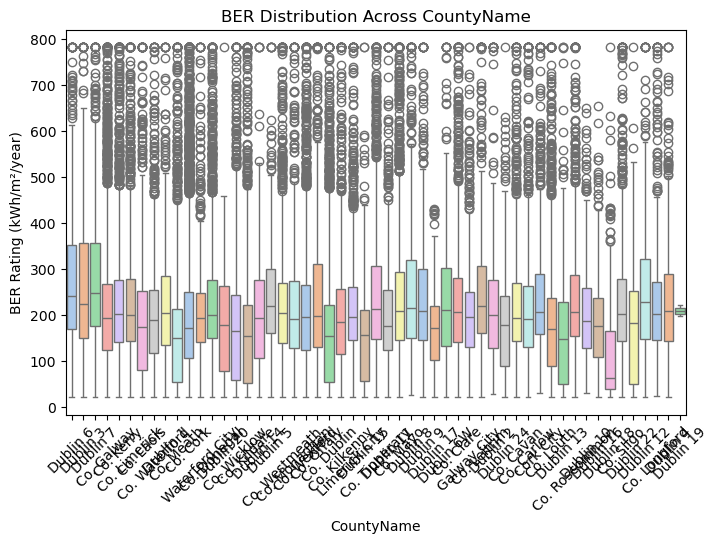

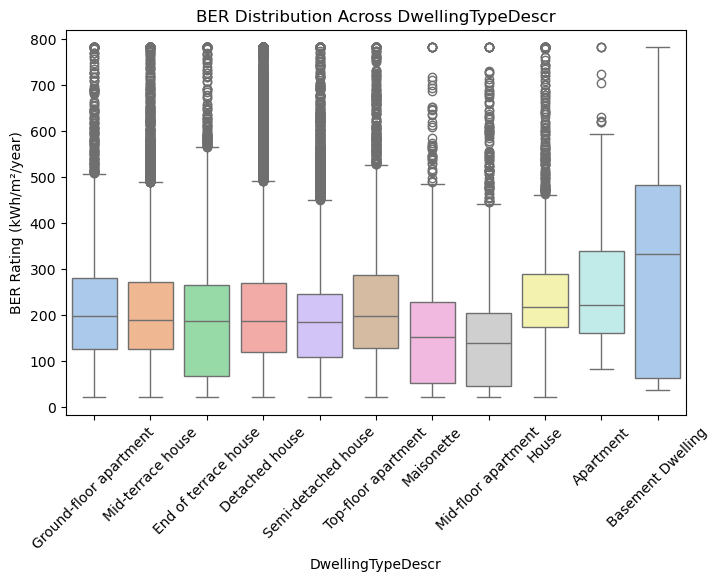

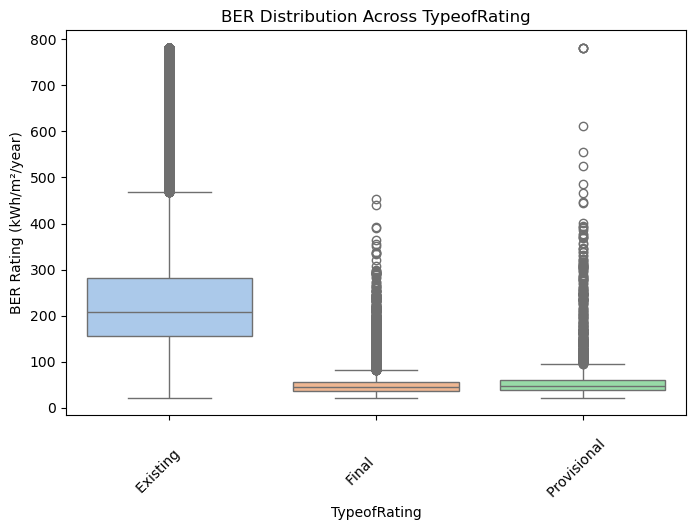

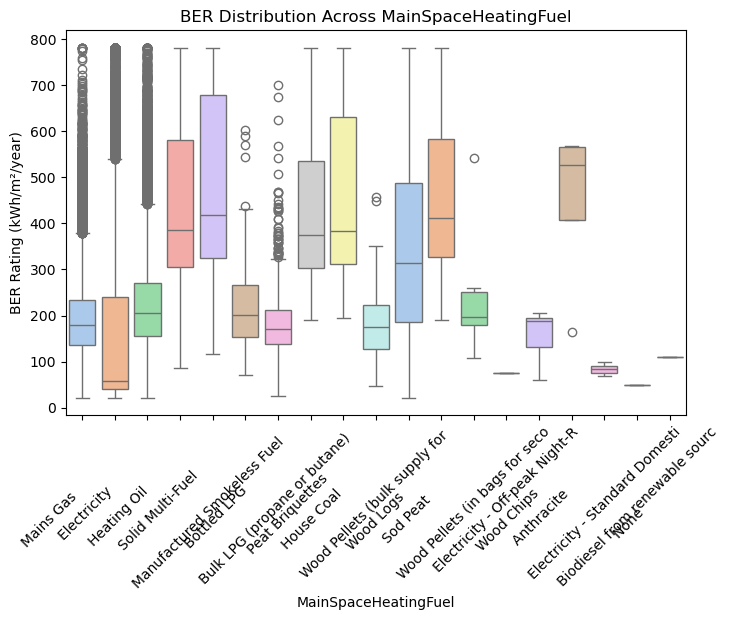

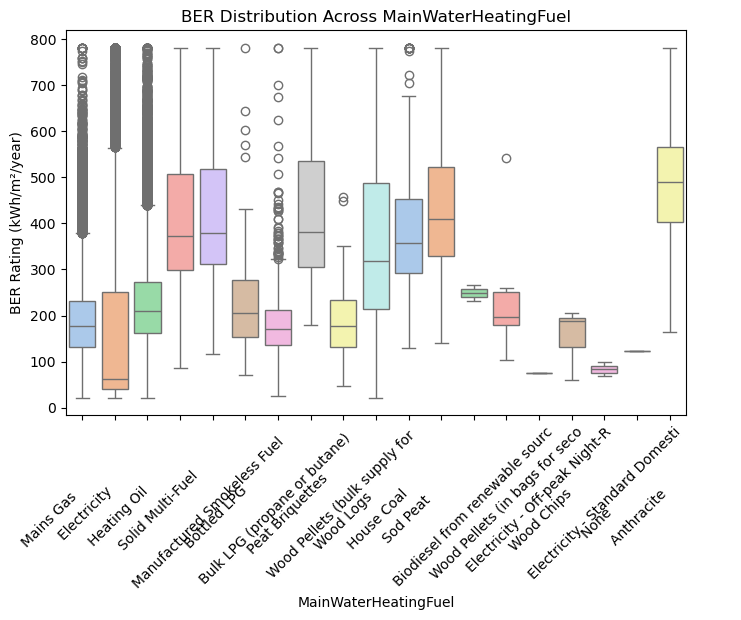

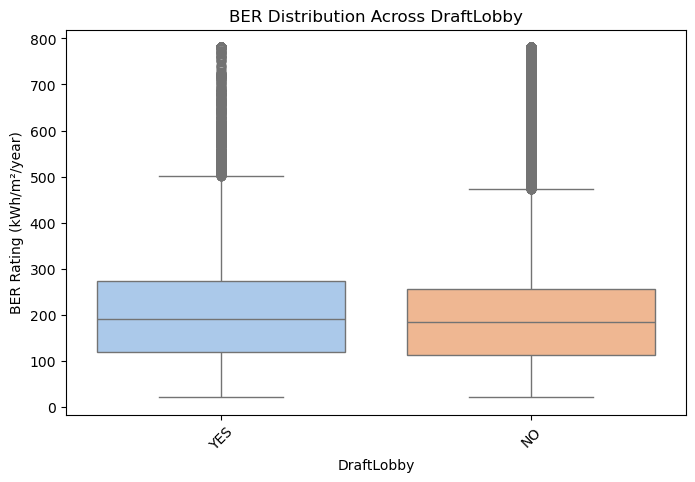

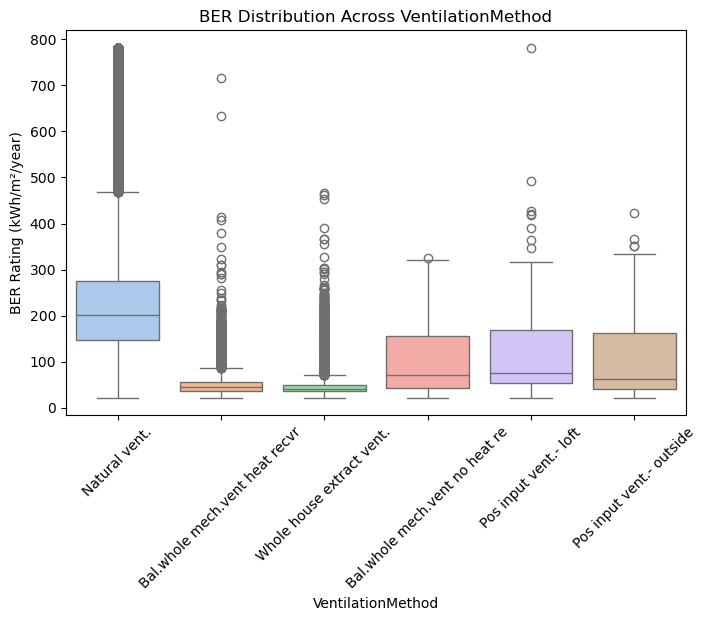

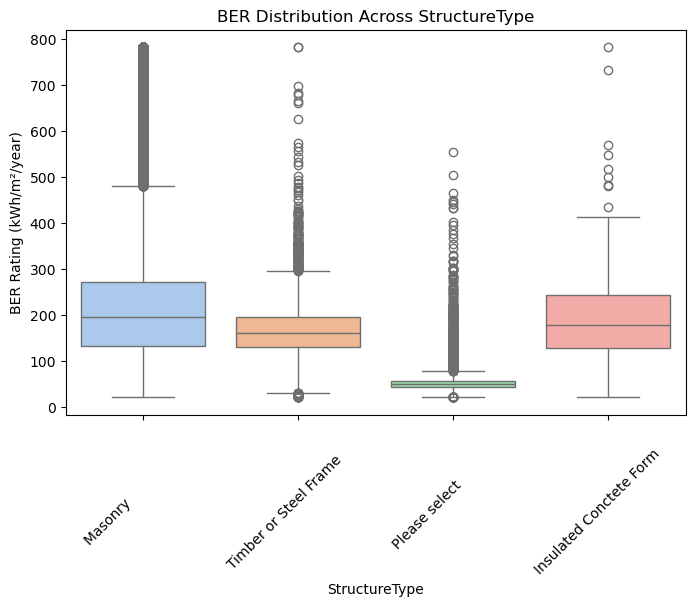

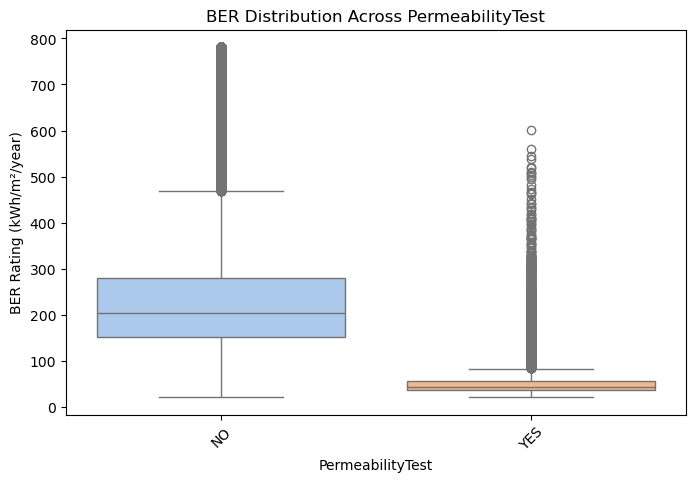

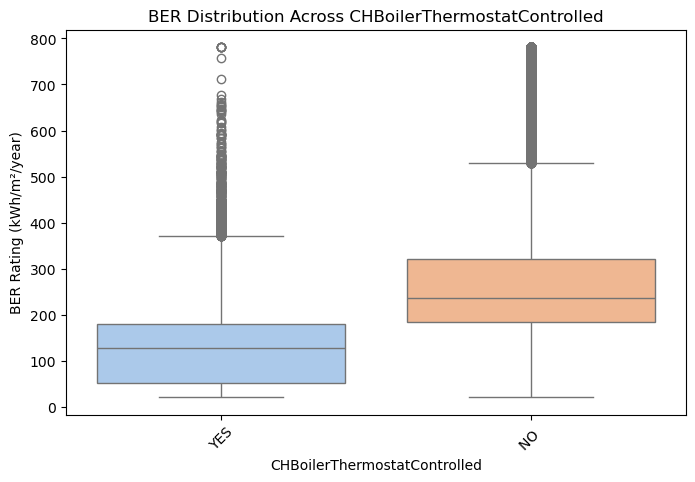

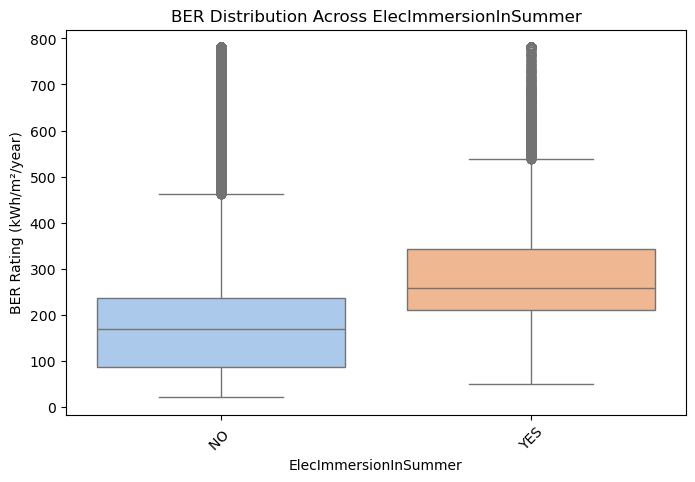

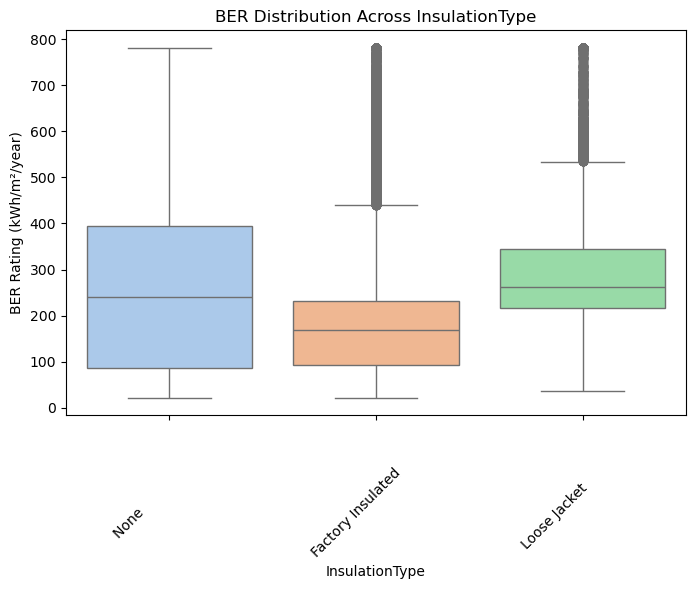

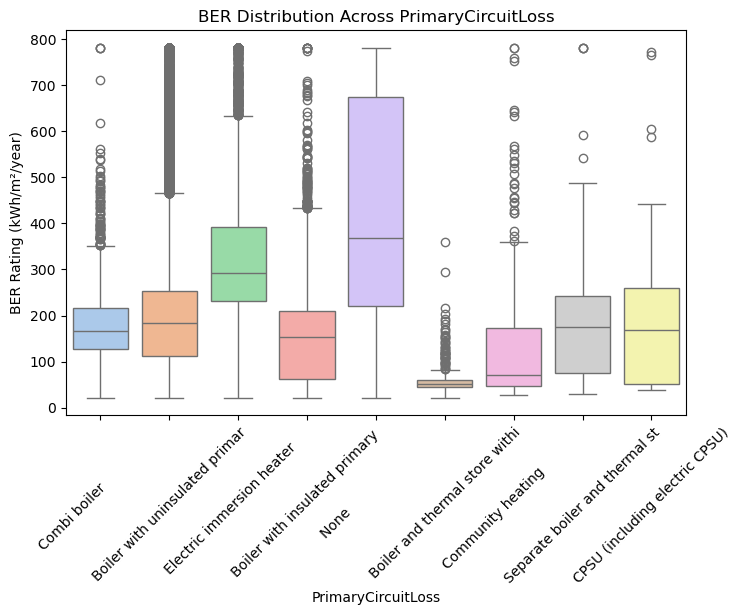

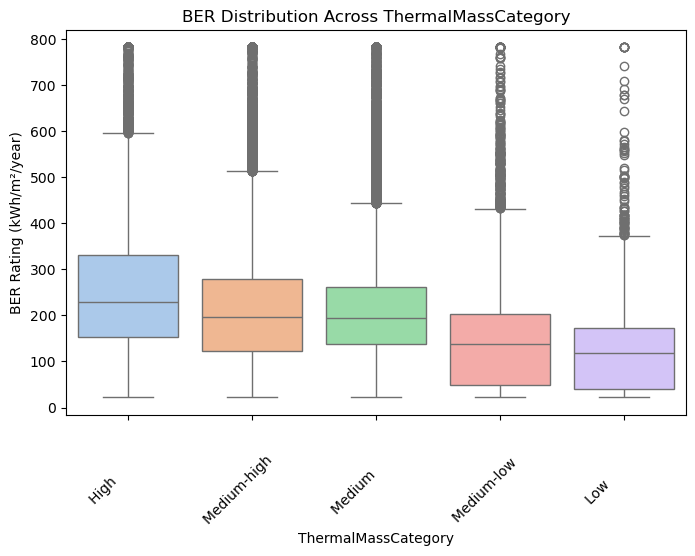

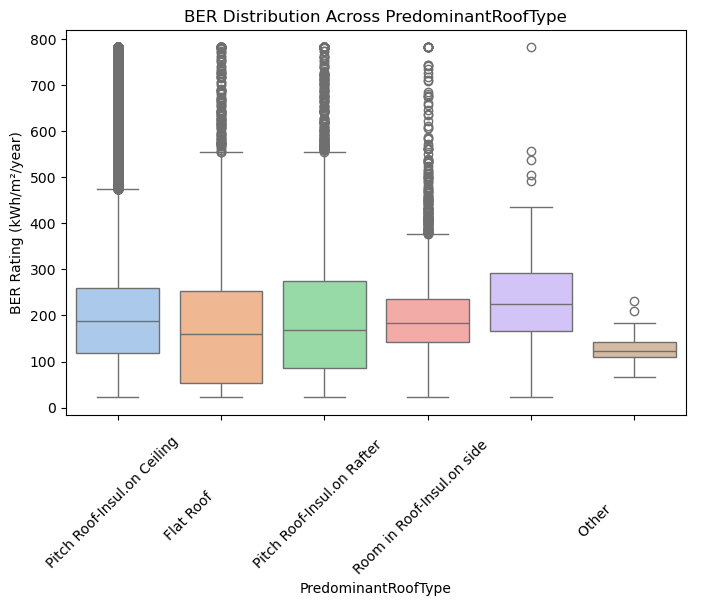

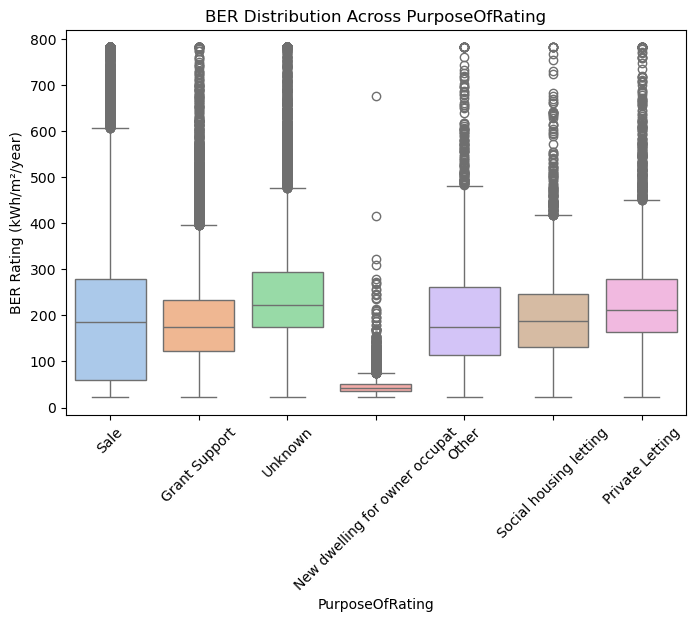

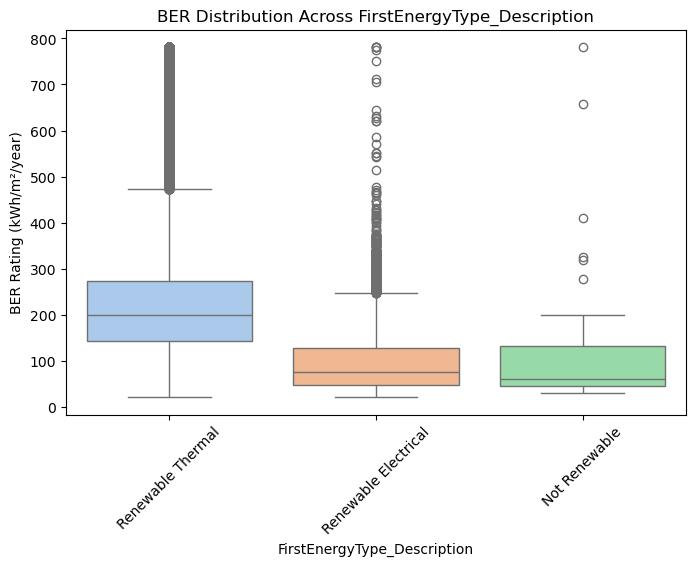

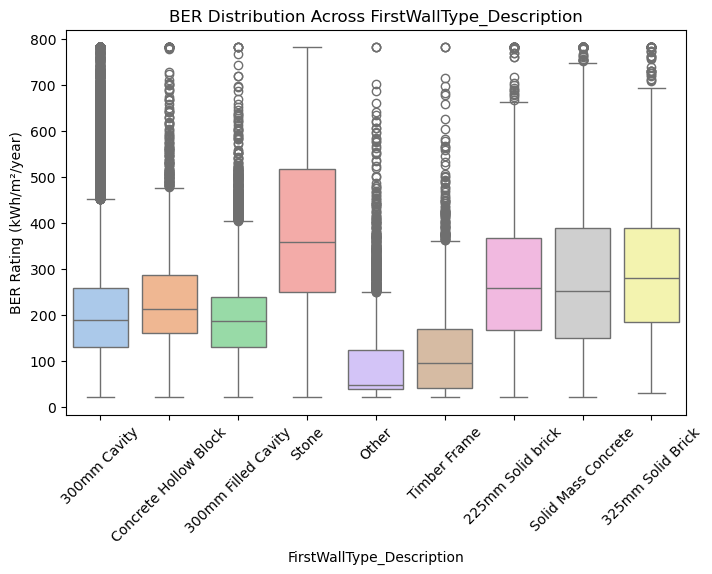

In [37]:
# Box plots for each categorical feature
for col in cat_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df[col], y=df['BerRating'], palette='pastel')
    plt.xticks(rotation=45)
    plt.title(f'BER Distribution Across {col}')
    plt.ylabel('BER Rating (kWh/m²/year)')
    plt.xlabel(col)
    plt.show()

In [38]:
# Compute median differences for each categorical feature
cat_median_diff = {}
for col in cat_cols:
    medians = df.groupby(col)['BerRating'].median()
    diff = medians.max() - medians.min()
    cat_median_diff[col] = diff

cat_median_diff = pd.Series(cat_median_diff).sort_values(ascending=False)

In [39]:
# Dynamic threshold: mean of median differences
threshold = cat_median_diff.mean()
print(f"Dynamic threshold (mean of median differences) = {threshold:.2f}\n")

Dynamic threshold (mean of median differences) = 186.50



In [40]:
high_impact_cat = cat_median_diff[cat_median_diff >= threshold]

print(f"Number of high-impact categorical features (median difference ≥ {threshold:.2f}): {len(high_impact_cat)}\n")
print("High-impact categorical features based on median difference:")
for col, diff in high_impact_cat.items():
    print(f"{col}: median difference = {diff:.2f}")

Number of high-impact categorical features (median difference ≥ 186.50): 5

High-impact categorical features based on median difference:
MainSpaceHeatingFuel: median difference = 476.57
MainWaterHeatingFuel: median difference = 427.16
PrimaryCircuitLoss: median difference = 316.09
FirstWallType_Description: median difference = 310.28
DwellingTypeDescr: median difference = 192.87


In [44]:
# Map each feature to its category (from feature lookup)
feature_cat_map = feature_lookup.set_index('feature_name')['category'].to_dict()

# Create DataFrame for all categorical features
cat_feature_df = pd.DataFrame({
    'feature_name': cat_cols,
    'MedianDiff': [cat_median_diff[f] for f in cat_cols],
})
cat_feature_df['category'] = cat_feature_df['feature_name'].map(feature_cat_map)

# Compute average median difference per category
category_median_diff = cat_feature_df.groupby('category')['MedianDiff'].mean().sort_values(ascending=False)

# Print category-wise averages
print("Average median difference per category:")
for cat, val in category_median_diff.items():
    print(f"{cat}: {val:.2f}")

Average median difference per category:
Heating: 331.95
Envelope: 187.54
Ventilation: 159.15
Geometry: 135.01
Energy: 113.72


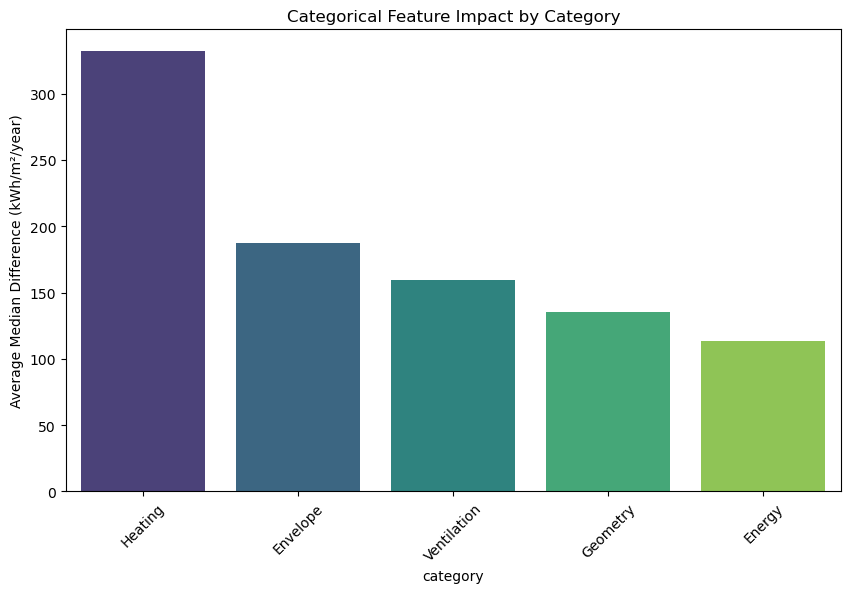

In [45]:
# Bar plot for overall category impact
plt.figure(figsize=(10,6))
sns.barplot(x=category_median_diff.index, y=category_median_diff.values, palette='viridis')
plt.xticks(rotation=45)
plt.ylabel('Average Median Difference (kWh/m²/year)')
plt.title('Categorical Feature Impact by Category')
plt.show()

**Observation:**  

From the categorical analysis, we see that features related to **heating, envelope and ventilation** tend to have larger differences in BER medians across their values. This suggests that these types of categorical variables may have a stronger impact on the BER rating compared to others. Overall, the plot shows which categories of features are generally more influential.
